Wartość p: 7.459687007352158e-06
Wynik F: 60.97066666666648
Średnia wyników Ct(target, test) wynosi 14.833333333333334
Średnia wyników Ct(reference, test) wynosi 18.1
Średnia wyników Ct(target, calibrator) wynosi 16.833333333333332
Średnia wyników Ct(reference, calibrator) wynosi 17.7
Błąd standardowy Ct(target, test) wynosi 0.20275875100994042
Błąd standardowy Ct(reference, test) wynosi 0.11547005383792577
Błąd standardowy Ct(target, calibrator) wynosi 0.23333333333333353
Błąd standardowy Ct(reference, calibrator) wynosi 0.17320508075688815
Znormalizowana wartość ekspresji 5.278031643091579


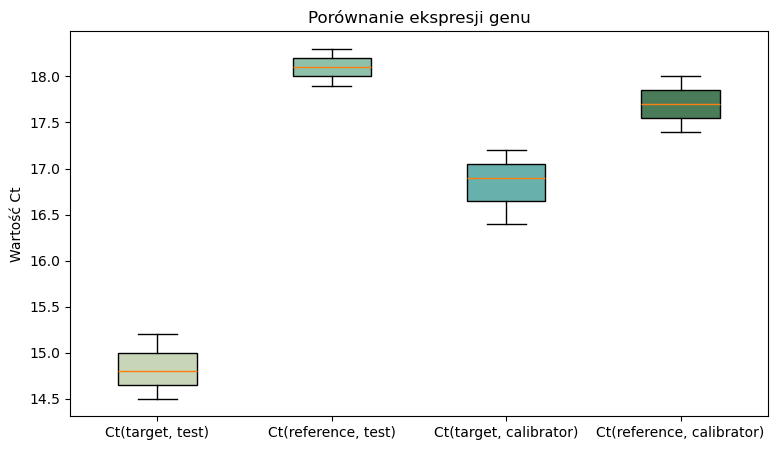

In [1]:
# Importowanie potrzebnych modułów
import statistics
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Deklaracja tablic i zmiennych
cycleThresholdTargetTest = []
cycleThresholdReferenceTest = []
cycleThresholdTargetCalibrator = []
cycleThresholdReferenceCalibrator = []

numberOfMeasurements = 3

# Zbieranie danych
# for x in range(numberOfMeasurements):
#     CTNumber = str(x+1)
#     message = 'wpisz '+ CTNumber +' wartość dla Ct(target, test)' 
#     print(message)
#     cycleThresholdTargetTest.append(float(input())) 

# for x in range(numberOfMeasurements):
#     CTNumber = str(x+1)
#     message = 'wpisz '+ CTNumber +' wartość dla Ct(reference, test)' 
#     print(message)
#     cycleThresholdReferenceTest.append(float(input())) 

# for x in range(numberOfMeasurements):
#     CTNumber = str(x+1)
#     message = 'wpisz '+ CTNumber +' wartość dla Ct(target, calibrator)' 
#     print(message)
#     cycleThresholdTargetCalibrator.append(float(input())) 

# for x in range(numberOfMeasurements):
#     CTNumber = str(x+1)
#     message = 'wpisz '+ CTNumber +' wartość dla Ct(reference, calibrator)' 
#     print(message)
#     cycleThresholdReferenceCalibrator.append(float(input())) 


# Przykładowe wartości danych do testów
# cycleThresholdTargetTest = [12, 13, 11]
# cycleThresholdReferenceTest = [17, 15.9, 14.8]
# cycleThresholdTargetCalibrator = [15, 16.1, 13.9]
# cycleThresholdReferenceCalibrator = [16.5, 15.5, 17.5]

cycleThresholdTargetTest = [14.5, 15.2, 14.8]
cycleThresholdReferenceTest = [18.1, 17.9, 18.3]
cycleThresholdTargetCalibrator = [16.4, 17.2, 16.9]
cycleThresholdReferenceCalibrator = [17.7, 17.4, 18.0]

# Obliczanie średnich wartości
cycleThresholdTargetTestMean = statistics.mean(cycleThresholdTargetTest)
cycleThresholdReferenceTestMean =  statistics.mean(cycleThresholdReferenceTest)
cycleThresholdTargetCalibratorMean =  statistics.mean(cycleThresholdTargetCalibrator)
cycleThresholdReferenceCalibratorMean =  statistics.mean(cycleThresholdReferenceCalibrator)

# Obliczanie odchylenia standardowego
cycleThresholdTargetTestStandardDeviation = statistics.stdev(cycleThresholdTargetTest)
cycleThresholdReferenceTestStandardDeviation =  statistics.stdev(cycleThresholdReferenceTest)
cycleThresholdTargetCalibratorStandardDeviation =  statistics.stdev(cycleThresholdTargetCalibrator)
cycleThresholdReferenceCalibratorStandardDeviation =  statistics.stdev(cycleThresholdReferenceCalibrator)

# Obliczanie błędu standardowego
cycleThresholdTargetTestStandardError = cycleThresholdTargetTestStandardDeviation / (numberOfMeasurements ** 0.5)
cycleThresholdReferenceTestStandardError = cycleThresholdReferenceTestStandardDeviation / (numberOfMeasurements ** 0.5)
cycleThresholdTargetCalibratorStandardError = cycleThresholdTargetCalibratorStandardDeviation / (numberOfMeasurements ** 0.5)
cycleThresholdReferenceCalibratorStandardError = cycleThresholdReferenceCalibratorStandardDeviation / (numberOfMeasurements ** 0.5)

# Obliczenie wartości ekspresji
deltaCtTest = cycleThresholdTargetTestMean - cycleThresholdReferenceTestMean

deltaCtCalibrator = cycleThresholdTargetCalibratorMean - cycleThresholdReferenceCalibratorMean

deltaDeltaCt = deltaCtTest - deltaCtCalibrator

normalizedExpresionRatio = pow(2,-deltaDeltaCt)

# Analiza wariancji jednoczynnikowej
resoultAnova = f_oneway(cycleThresholdTargetTest, cycleThresholdReferenceTest, cycleThresholdTargetCalibrator, cycleThresholdReferenceCalibrator)

print('Wartość p: ' + str(resoultAnova.pvalue))
print('Wynik F: ' + str(resoultAnova.statistic))

# Wyświetlanie wartości średnich i błędu standardowego obliczonych powyżej
print('Średnia wyników Ct(target, test) wynosi '+str(cycleThresholdTargetTestMean))
print('Średnia wyników Ct(reference, test) wynosi '+str(cycleThresholdReferenceTestMean))
print('Średnia wyników Ct(target, calibrator) wynosi '+str(cycleThresholdTargetCalibratorMean))
print('Średnia wyników Ct(reference, calibrator) wynosi '+str(cycleThresholdReferenceCalibratorMean))

print('Błąd standardowy Ct(target, test) wynosi ' + str(cycleThresholdTargetTestStandardError))
print('Błąd standardowy Ct(reference, test) wynosi ' + str(cycleThresholdReferenceTestStandardError))
print('Błąd standardowy Ct(target, calibrator) wynosi ' + str(cycleThresholdTargetCalibratorStandardError))
print('Błąd standardowy Ct(reference, calibrator) wynosi ' + str(cycleThresholdReferenceCalibratorStandardError))

# Wyświetlenie wartości ekspresji
print('Znormalizowana wartość ekspresji '+str(normalizedExpresionRatio))


# Tworzenie wykresu ramka wąsy
data = [cycleThresholdTargetTest, cycleThresholdReferenceTest, cycleThresholdTargetCalibrator, cycleThresholdReferenceCalibrator]

fig = plt.figure(figsize =(9, 5))
ax = fig.add_subplot(111)
bp = ax.boxplot(data, patch_artist = True)

colors = ['#c8d5b9', '#8fc0a9', 
          '#68b0ab', '#4a7c59']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

ax.set_xticklabels(['Ct(target, test)', 'Ct(reference, test)', 
                    'Ct(target, calibrator)','Ct(reference, calibrator)'])

plt.title("Porównanie ekspresji genu")
plt.ylabel("Wartość Ct")
plt.show ()
